In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import expon
import math
%matplotlib inline

Выбираю экспоненциальное распределение. 
При таком распределении задаем параметр lambda (интенсивность), который является обратной величиной scale (=1/lambda).
Ниже ссылка вики:
https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

В нашем случае выбираем параметр scale=2.0 и генерируем выборку экспоненциального распределения объемом 1000 наблюдений.
Строим гистограмму данной выборки и поверх добавляем теоретическую плотность распределения случайной величины, также с параметром масштаба scale=2.0

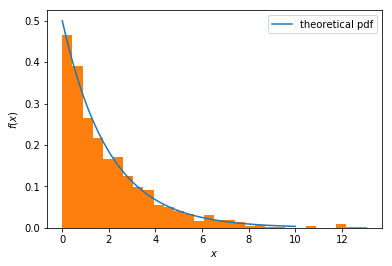

In [2]:
r=expon.rvs(scale=2.0,size=1000)
x = np.linspace(0,10,100)
pdf = expon(scale=2.0).pdf(x)
plt.plot(x, pdf, label="theoretical pdf")
plt.hist(r, bins=30,normed=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

Приступаем к оценке распределения выборочного среднего моей случайной величины при объеме $n_1$=5.
Генерируем 1000 выборок по $n_1$ элементам и садим полученные значения выборочного среднеги каждой из 1000 сгенерированных выборок объемом $n_1$ в список list means_1.

In [3]:
means_1=list()
n_1=5
for i in xrange(0,1000):
    r_1=expon.rvs(loc=0,scale=2.0,size=n_1)
    means_1.append(r_1.mean())

Матожидание экспоненциального распределения равно $\frac{1}{\lambda}=scale$. В нашем случае матожидание=2.0.
Дисперсия экспоненциального распределения равна
    $\frac{1}{\\\lambda^2} =scale^2$ 
   
В нашем случае дисперсия=4.0.
Использовать найденные выше по формулам теоретические среднее и дисперсию моей случайной величины, определяем по ЦПТ параметры для нормального расределения, которое должно описывать средневыборочное.
Матожидание =2.0 и стандартное отклонение=$\surd\frac{4.0}{n_1}$

Рисуем гисторамму распределения выборочных средних сгенерированных ранее выборок объемом $n_1=5$ и поверх добавляем плотность нормального распределения с рассчитанными по ЦПТ параметрами ввода. 

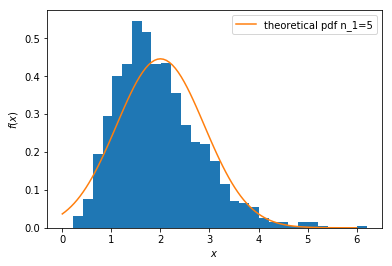

In [5]:
norm_rv1=sts.norm(2.0,math.sqrt(4./n_1))
plt.hist(means_1,bins=30, normed=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
x=np.linspace(0,6,100)
pdf=norm_rv1.pdf(x)
plt.plot(x,pdf, label="theoretical pdf n_1=5")
plt.legend()

Аналогично, повторяю действия для $n_2=10$

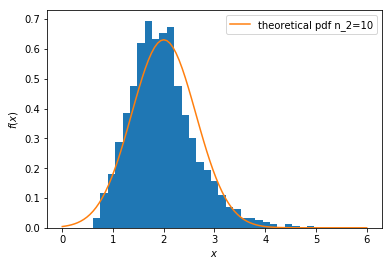

In [6]:
means_2=list()
n_2=10
for i in xrange(0,1000):
    r_2=expon.rvs(loc=0,scale=2.0,size=n_2)
    means_2.append(r_2.mean())
    
norm_rv2=sts.norm(2.0,math.sqrt(4./n_2))
plt.hist(means_2,bins=30, normed=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
x2=np.linspace(0,6,100)
pdf2=norm_rv2.pdf(x2)
plt.plot(x2,pdf2, label="theoretical pdf n_2=10")
plt.legend()

Аналогично, повторяю действия для $n_3=50$

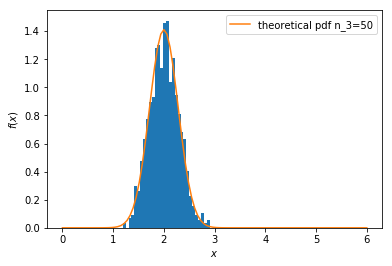

In [7]:
means_3=list()
n_3=50
for i in xrange(0,1000):
    r_3=expon.rvs(loc=0,scale=2.0, size=n_3)
    means_3.append(r_3.mean())

norm_rv3=sts.norm(2.0,math.sqrt(4.0/float(n_3)))
plt.hist(means_3,bins=30, normed=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
x3=np.linspace(0,6,100)
pdf3=norm_rv3.pdf(x3)
plt.plot(x3,pdf3, label="theoretical pdf n_3=50")
plt.legend()

Выводы: по выполнении 3х подходов с генерацией 1000 выборок экспоненчиального распределения с разными объемами, мы убеждаемся, что ЦПТ работает; а именно, с увеличением n увеличивается точность аппроксимации распределения средневыборочного нормальным распределением. 
Визуально мы видим как с увеличеним n гистрограммы распределений средневыборочного больше походят на нормальное симметричное распределение, больше укладываются под плотностью нормального распределения. Мы видим как по гистограмме, так и по плотности нормального распределения, что с увеличением n распределение средневыборочного становится глаже и сужается, дисперсия становится меньше. 